In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

# import data

In [2]:
df= pd.read_excel("C:/Users/44742/Documents/NHFormattedDATA.xlsx")

In [3]:
df.head(3) 

,PublishedRecordId,Region,Site/Project,Event Type,Date and Time of Event,vehicles involved?,Type of Person,Location,Did this event occur on the SRN?,Part of Body Affected,...,Actual Severity Rating,month,Season,Type_of_work,Year,Injury occurrence,Project risk level,day_of_week,time,time_of_day
0,131601,East - Outstations & ROCs,South Mimms Outstation,Undesired Circumstance / Near Miss,2022-08-09 18:20:00,False,Employee,Carriageway Slip Rd K,0,Not applicable,...,11,8,Summer,Traffic management/control,2022,No,medium,Tuesday,18,Evening
1,131600,East - Outstations & ROCs,South Mimms Outstation,Undesired Circumstance / Near Miss,2022-08-09 17:00:00,False,Employee,Carriageway B,0,Not applicable,...,11,8,Summer,Traffic management/control,2022,No,medium,Tuesday,17,Evening
2,131599,Yorkshire & North East - Outstations & ROCs,Calder Park ROC,Undesired Circumstance / Near Miss,2022-08-08 20:14:00,False,Employee,Carriageway Slip Rd J,0,Not applicable,...,11,8,Summer,Traffic management/control,2022,No,medium,Monday,20,Night


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64912 entries, 0 to 64911
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   PublishedRecordId                 64912 non-null  int64         
 1   Region                            64912 non-null  object        
 2   Site/Project                      64912 non-null  object        
 3   Event Type                        64912 non-null  object        
 4   Date and Time of Event            64912 non-null  datetime64[ns]
 5   vehicles involved?                64858 non-null  object        
 6   Type of Person                    64912 non-null  object        
 7   Location                          55046 non-null  object        
 8   Did this event occur on the SRN?  64912 non-null  object        
 9   Part of Body Affected             64912 non-null  object        
 10  Injury Type                       64912 non-nu

In [5]:
df['Injury Type'].unique()

array(['Not applicable', 'Strain/sprain', 'Other', 'Cut/laceration',
       'Fracture', 'Swelling/Oedema', 'Puncture Wound', 'Foreign body',
       'Musculoskeletal', 'Abrasion', 'Crush', 'Amputation', 'Bruising',
       'Visual Issues', 'Ingestion', 'Scald/burn(non-chemical)',
       'Contact/exposure(chemicals)', 'Dislocation', 'Concussion',
       'Electric shock'], dtype=object)

In [6]:
df['Injury Type'].nunique() #there are 297 unique elements in site column

20

In [7]:
df['Event Type'].unique() #different types of events classified

array(['Undesired Circumstance / Near Miss', 'Incursion / IPV Strike',
       'Infrastructure / Asset', 'Environmental',
       'Personal illness or injury', 'Structural Safety', 'Security',
       'Facilities / Site', 'Utility Strike'], dtype=object)

# model building

In [8]:
df=df.dropna()

In [9]:
df["vehicles involved?"].replace({"True": "Yes", "False": "No"}, inplace=True)

In [10]:
df["vehicles involved?"].replace({"Yes": "1", "No": "0"}, inplace=True)

In [11]:
df.head()

,PublishedRecordId,Region,Site/Project,Event Type,Date and Time of Event,vehicles involved?,Type of Person,Location,Did this event occur on the SRN?,Part of Body Affected,...,Actual Severity Rating,month,Season,Type_of_work,Year,Injury occurrence,Project risk level,day_of_week,time,time_of_day
0,131601,East - Outstations & ROCs,South Mimms Outstation,Undesired Circumstance / Near Miss,2022-08-09 18:20:00,False,Employee,Carriageway Slip Rd K,0,Not applicable,...,11,8,Summer,Traffic management/control,2022,No,medium,Tuesday,18,Evening
1,131600,East - Outstations & ROCs,South Mimms Outstation,Undesired Circumstance / Near Miss,2022-08-09 17:00:00,False,Employee,Carriageway B,0,Not applicable,...,11,8,Summer,Traffic management/control,2022,No,medium,Tuesday,17,Evening
2,131599,Yorkshire & North East - Outstations & ROCs,Calder Park ROC,Undesired Circumstance / Near Miss,2022-08-08 20:14:00,False,Employee,Carriageway Slip Rd J,0,Not applicable,...,11,8,Summer,Traffic management/control,2022,No,medium,Monday,20,Night
4,131597,East - Operations,DBFO - M40 J1-15 Denham to Warwick (area 30),Undesired Circumstance / Near Miss,2022-08-08 12:30:00,False,Contractor,Off Network e.g. Local Authority Road Footpath...,0,Not applicable,...,11,8,Summer,Highway construction work,2022,No,medium,Monday,12,Afternoon
7,131594,Yorkshire & North East - Outstations & ROCs,Tingley Outstation,Undesired Circumstance / Near Miss,2022-08-09 16:10:00,False,Employee,Carriageway Slip Rd L,0,Not applicable,...,11,8,Summer,Traffic management/control,2022,No,medium,Tuesday,16,Evening


In [12]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()
#label_encoder2 = preprocessing.LabelEncoder()
#le_transform = label_encoder2.fit_transform(df['Event Type'])
#df['Event Type']= le_transform 
df['day_of_week']= le.fit_transform(df['day_of_week'])
df['Injury occurrence']= le.fit_transform(df['Injury occurrence'])
df['Type_of_work']= le.fit_transform(df['Type_of_work'])
df['Project risk level']= le.fit_transform(df['Project risk level'])
df['Season']= le.fit_transform(df['Season'])
df['month']= le.fit_transform(df['month'])
df['Injury Type']= le.fit_transform(df['Injury Type'])
df['Part of Body Affected']= le.fit_transform(df['Part of Body Affected'])
df['Did this event occur on the SRN?']= le.fit_transform(df['Did this event occur on the SRN?'])
df['Location']= le.fit_transform(df['Location'])
df['Type of Person']= le.fit_transform(df['Type of Person'])
df['Site/Project']= le.fit_transform(df['Site/Project'])
df['Region']= le.fit_transform(df['Region'])
df['time_of_day']= le.fit_transform(df['time_of_day'])
df['Weather / Visibility']= le.fit_transform(df['Weather / Visibility'])
df['Event Type']=le.fit_transform(df['Event Type'])

In [13]:
df['Project risk level']= df['Project risk level'].replace(['low','Medium','High'],[1,2,3]) 

In [14]:
matrix=df.corr()

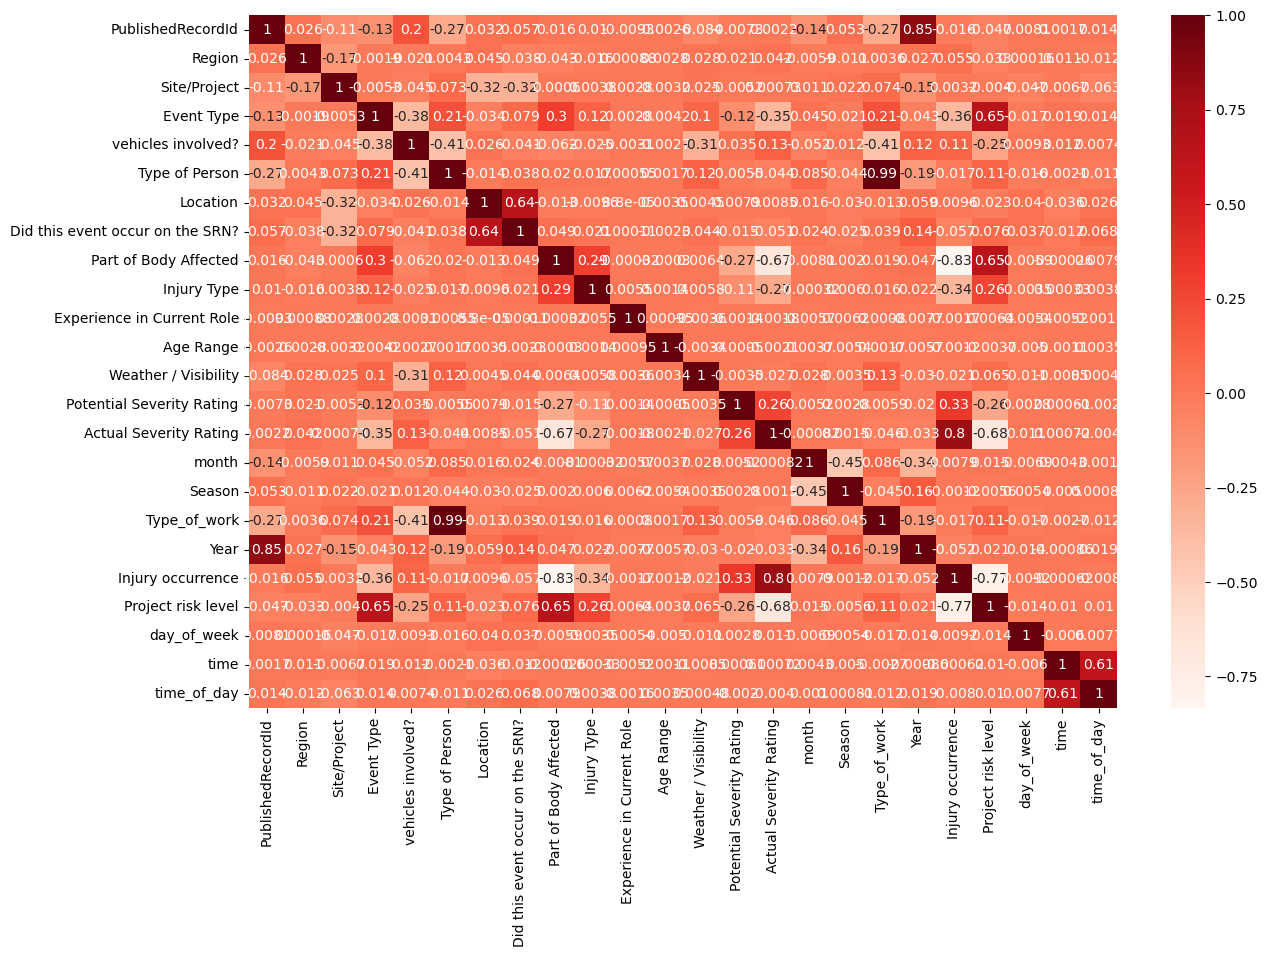

In [15]:
plt.figure(figsize=(14,9))
sns.heatmap(matrix,cmap='Reds',annot=True)
plt.show()

In [16]:
injury_label_data= df.drop(['Date and Time of Event','Injury Type'], axis=1)

In [17]:
injury_matrix=injury_label_data.corr()

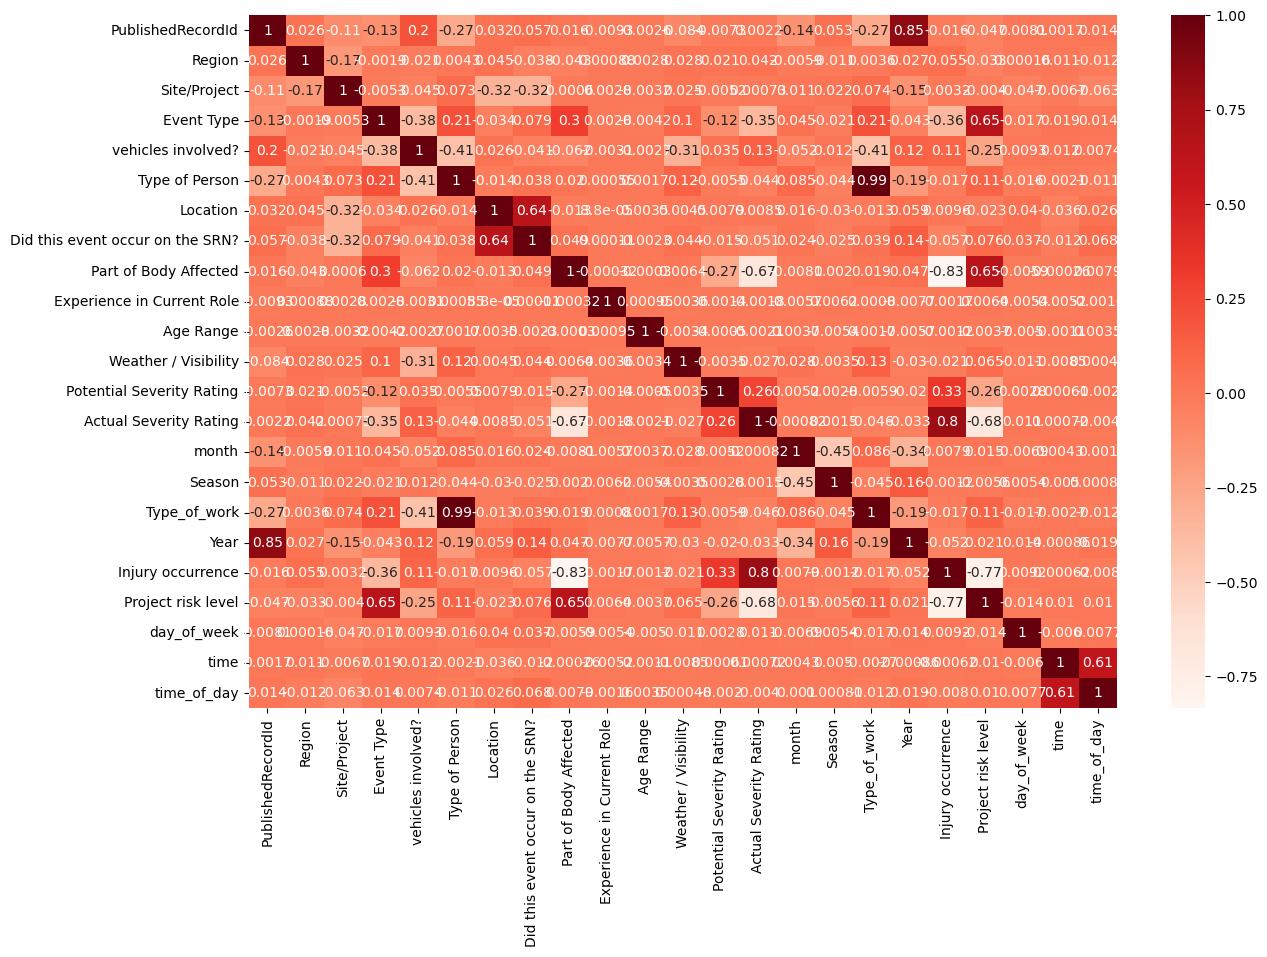

In [18]:
plt.figure(figsize=(14,9))
sns.heatmap(injury_matrix,cmap='Reds',annot=True)
plt.show()

In [19]:
df.describe()

,PublishedRecordId,Region,Site/Project,Event Type,Type of Person,Location,Did this event occur on the SRN?,Part of Body Affected,Injury Type,Experience in Current Role,...,Actual Severity Rating,month,Season,Type_of_work,Year,Injury occurrence,Project risk level,day_of_week,time,time_of_day
count,55013.000000,55013.000000,55013.000000,55013.000000,55013.000000,55013.000000,55013.000000,55013.000000,55013.000000,55013.000000,...,55013.000000,55013.000000,55013.000000,55013.000000,55013.000000,55013.000000,55013.000000,55013.000000,55013.000000,55013.000000
mean,51006.285078,13.053151,141.132405,6.603948,1.972970,9.173704,0.143348,117.685620,12.933888,11.943232,...,11.507244,5.550870,1.484322,1.972679,2020.166361,0.031284,1.882210,3.184465,12.659190,2.140730
std,31127.945965,8.577185,91.561205,1.307602,0.231759,8.809203,0.350431,15.050422,1.072065,6.620475,...,3.036534,3.466952,1.132225,0.231724,1.141895,0.174084,0.438601,2.098905,6.318231,1.362912
min,8056.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28869.000000,5.000000,58.000000,7.000000,2.000000,1.000000,0.000000,120.000000,13.000000,6.000000,...,11.000000,2.000000,0.000000,2.000000,2019.000000,0.000000,2.000000,1.000000,8.000000,1.000000
50%,44404.000000,13.000000,107.000000,7.000000,2.000000,4.000000,0.000000,120.000000,13.000000,12.000000,...,11.000000,6.000000,2.000000,2.000000,2020.000000,0.000000,2.000000,4.000000,12.000000,2.000000
75%,61084.000000,18.000000,240.000000,7.000000,2.000000,18.000000,0.000000,120.000000,13.000000,18.000000,...,11.000000,9.000000,2.000000,2.000000,2021.000000,0.000000,2.000000,5.000000,18.000000,3.000000
max,131601.000000,28.000000,278.000000,8.000000,3.000000,24.000000,1.000000,175.000000,19.000000,23.000000,...,25.000000,11.000000,3.000000,2.000000,2022.000000,1.000000,2.000000,6.000000,23.000000,4.000000


# building the model

In [20]:
X= df.drop(['Date and Time of Event','vehicles involved?','Injury Type','time','PublishedRecordId'], axis=1)
y=df['Injury Type']

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
MinMaxScaler
X=scaler.transform(X)

In [22]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test


In [31]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = rf.predict(X_test)

In [32]:
#Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.16 degrees.


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [36]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",#metrics.
      accuracy_score(y_test, y_pred))


Accuracy: 0.9778235579253515


In [39]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='micro'))

print("area under curve (auc): ", metrics.roc_auc_score(y_test, y_pred, multi_class='ovr'))

Precision: 0.9778235579253515
Recall: 0.9778235579253515


AxisError: axis 1 is out of bounds for array of dimension 1

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[    0     0     1     0     0     0    14     0     0     0     0     1
      1     9     0     0     2     0     0]
 [    0     0     0     0     0     0     1     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0    12     0     0     0    20     0     0     0     0     0
      8     8     0     0    22     1     0]
 [    0     0     0     0     0     0     1     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     1     0     0     0     0     0
      1     2     0     0     0     0     0]
 [    0     0     1     0     0     1     2     0     0     0     0     0
      0     0     0     0     2     0     0]
 [    1     0     9     0     0     0    44     0     0     0     0     4
      0     9     0     0     7     1     0]
 [    0     0     1     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     1     

C:\Users\44742\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\44742\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\44742\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable

X_smote, y_smote = smote.fit_resample(X, y)
 
print('Original dataset shape', y.count())
print('Resample dataset shape', y_smote.count())

TypeError: __init__() got an unexpected keyword argument 'kind'

X1_train, X1_test, y1_train, y1_test = train_test_split(X_smote, y_smote, test_size=0.3,random_state=109) # 70% training and 30% test

#Import svm model
from sklearn import svm
#Create a svm Classifier
clf2 = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf2.fit(X1_train[0:50000], y1_train[0:50000])

#Predict the response for test dataset
y1_pred = clf2.predict(X1_test)


from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

print("Precision:",metrics.precision_score(y1_test, y1_pred,average='micro'))

from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y1_test,y1_pred))
print(classification_report(y1_test,y1_pred))

In [ ]:
#define input

pd.DataFrame(X)

new_input = [[0.107143, 0.899281, 0.666667,0.166667,0.0,0.685714, 0.4, 1.000000,0.390244,0.4,0.500000
            ,0.5, 0.636364,0.666667,1.0,1.0,0.0,1.0, 0.833333,0.50]]

new_output = clf2.predict(new_input)
new_output

df['Event Type'].unique()

trans=le.inverse_transform(df['Event Type'].unique())

trans

# Project risk level

X2= df.drop(['Date and Time of Event','vehicles involved?','Project risk level','PublishedRecordId'], axis=1)
y2=df['Project risk level']

df['Project risk level'].unique()

# Split dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,random_state=109) # 70% training and 30% test

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X2_train, y2_train)
#Predict the response for test dataset
y2_pred = rf.predict(X2_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

print(confusion_matrix(y2_test,y2_pred))
print(classification_report(y2_test,y2_pred))

# Calculate the absolute errors
errors = abs(y2_pred - y2_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

le.inverse_transform(df['Project risk level'].unique())

#Create a svm Classifier
clf = svm.SVC(kernel='poly') # polynomial Kernel

#Train the model using the training sets
clf.fit(X2_train, y2_train)

#Predict the response for test dataset
y2_pred = clf.predict(X2_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

print(confusion_matrix(y2_test,y2_pred))
print(classification_report(y2_test,y2_pred))

le.inverse_transform(df['Project risk level'].unique())